In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from sympy import diff, symbols, cos, sin, tan
from scipy.misc import derivative
from scipy.optimize import minimize, differential_evolution
%matplotlib inline

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
def get_cos(a, b):
    len_a = np.linalg.norm(a)
    len_b = np.linalg.norm(b)
    return np.dot(a, b) / (len_a * len_b)

for i in range(len(ratings)):
    target = 0
    for j in range(len(ratings)):
        if i != j:
            cos = get_cos(ratings[i], ratings[j])
            if cos > target:
                target = cos
                user = j + 1
            
    print(f'({i+1}, {user})')

(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)
new_ratings = svd.fit_transform(ratings)
new_ratings

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [5]:
def f(x):
    return math.tan(math.sin(x) + math.cos(2*x+3))**2

derivative(f, 1.0, dx=1e-6)

55.3859176464222

y = 𝑡𝑔ˆ2(𝑠𝑖𝑛(𝑥)+𝑐𝑜𝑠(2𝑥+3))

##### В точке 1

y'= 2*(1 + tan(sin(1.0) + cos(5.0))^2)*(-2*sin(5.0) + cos(1.0))*tan(sin(1.0) + cos(5.0))

### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [6]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [7]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [8]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

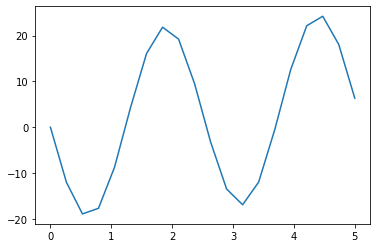

In [9]:
plt.plot(x, fx)
plt.show()

In [10]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [11]:
bounds = [(-5, 5), (-5, 5)]
result = differential_evolution(error, bounds, seed=50)
result

     fun: 1.5113849896053466e-06
 message: 'Optimization terminated successfully.'
    nfev: 1923
     nit: 61
 success: True
       x: array([ 3. , -2.5])

### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [12]:
elements = [i for i in range(1, 21)]
probabilities = [0.02, 0.02, 0.003, 0.01, 0.01, 0.01, 0.01, 0.07, 0.003, 0.02, 0.005, 0.24, 0.006, 0.15, 0.08, 0.02, 0.003, 0.25, 0.06, 0.01]


In [13]:
def draw_samples():
    samples_count = 1000
    #массивы для сохранения средних по выборкам
    a1 = np.array([])

    for number in range(samples_count):
        random_value = np.random.choice(elements, 50, p=probabilities)
        a1 = np.append(a1, random_value.mean())
        
    #строим графики
    #подписи для графиков
    label_1 = 'sample of ' + str(50) + ' histogram'
    plt.hist(a1, density=True, label=label_1)

    plt.legend()
    plt.ylabel('samples means')
    plt.xlabel('$x$')

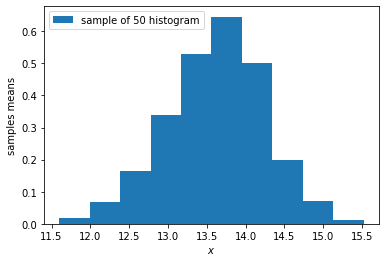

In [14]:
draw_samples()

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, -4],

[1, 1]]

Матрица $\begin{pmatrix}1 & -4\\ 1 & 1\end{pmatrix} $

Определитель матрицы $\begin{vmatrix}1 - \lambda & -4\\ 1 & 1 - \lambda\end{vmatrix} = 0 $

$(1 - \lambda)^2+4 = 0$

$1 - 2\lambda + \lambda^2 +4 = 0 $

$\lambda^2- 2\lambda +5 = 0 $

$ D = 4 - 20 = -16 = $ уравнение не имеет корней

In [15]:
matrix = np.array([[1, -4],
              [1, 1]])

In [16]:
w, v = np.linalg.eig(matrix)
print('Собственные значения:')
print(w)
print('\nСобственные векторы:')
print(v)

Собственные значения:
[1.+2.j 1.-2.j]

Собственные векторы:
[[0.89442719+0.j        0.89442719-0.j       ]
 [0.        -0.4472136j 0.        +0.4472136j]]


###### При неотрицательных значениях матрицы

$\boldsymbol{A}=\begin{bmatrix}
1 & 4\\ 
1 & 1 \\
\end{bmatrix}$

$\begin{bmatrix}
1-\lambda  & 4\\ 
1 & 1-\lambda
\end{bmatrix}=0$

$\lambda^2-2\lambda-3=0$

$\lambda_1=-1$

$\lambda_2=3$

При $\lambda_1=-1$:

$\begin{cases}
 & 2x+4y=0 \\ 
 & x+2y=0  
\end{cases}$

$\boldsymbol{v_1}=\begin{bmatrix}
2\\ 
-1
\end{bmatrix}$

При $\lambda_2=3$:

$\begin{cases}
 & -2x+4y=0 \\ 
 & x-2y=0  
\end{cases}$

$\boldsymbol{v_2}=\begin{bmatrix}
2\\ 
1
\end{bmatrix}$